Завдання №1

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
df = pd.read_html(url)
vvp_df = df[2]
vvp_df

Country/Territory IMF[1][13]            World Bank[14]             \
    Country/Territory   Forecast       Year       Estimate       Year   
0               World  109529216       2024      105435540       2023   
1       United States   28781083       2024       27360935       2023   
2               China   18532633  [n 1]2024       17794782  [n 3]2023   
3             Germany    4591100       2024        4456081       2023   
4               Japan    4110452       2024        4212945       2023   
..                ...        ...        ...            ...        ...   
205          Kiribati        311       2024            279       2023   
206             Palau        308       2024            263       2023   
207  Marshall Islands        305       2024            284       2023   
208             Nauru        161       2024            154       2023   
209            Tuvalu         66       2024             62       2023   

    United Nations[15]             
              Estimate       Year  
0            100834796       2022  
1             25744100       2022  
2             17963170  [n 1]2022  
3              4076923       2022  
4              4232173       2022  
..                 ...        ...  
205                223       2022  
206                225       2022  
207                279       2022  
208                147       2022  
209                 59       2022  

[210 rows x 7 columns]

1. Вивести перших 5 рядків.

In [382]:
vvp_df.head(5)

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

2. Визначити розмір датасета.

In [383]:
vvp_df.shape

(210, 7)

3. Визначити оптимальну кількість стовпців.

In [384]:
vvp_df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

4. Змінити назви стовпців на більш зручні, наприклад Country MVF_2024 WorldBank_2023 OON_2022

In [385]:
column_namees = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'World Bank_Estimate',
    'World Bank_Year',
    'United Nations_Estimate',
    'United Nations_Year'
]
vvp_df.columns = column_namees
vvp_df = vvp_df[vvp_df['Country'] != 'World']
vvp_df

,Country,IMF_Forecast,IMF_Year,World Bank_Estimate,World Bank_Year,United Nations_Estimate,United Nations_Year
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022
5,India,3937011,2024,3549919,2023,3465541,2022
...,...,...,...,...,...,...,...
205,Kiribati,311,2024,279,2023,223,2022
206,Palau,308,2024,263,2023,225,2022
207,Marshall Islands,305,2024,284,2023,279,2022
208,Nauru,161,2024,154,2023,147,2022


In [386]:
vvp_df = vvp_df.drop(columns=['IMF_Year', 'World Bank_Year', 'United Nations_Year'])
vvp_df

,Country,IMF_Forecast,World Bank_Estimate,United Nations_Estimate
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173
5,India,3937011,3549919,3465541
...,...,...,...,...
205,Kiribati,311,279,223
206,Palau,308,263,225
207,Marshall Islands,305,284,279
208,Nauru,161,154,147


5. Визначити тип даних

In [387]:
vvp_df.dtypes

Country                    object
IMF_Forecast               object
World Bank_Estimate        object
United Nations_Estimate    object
dtype: object

In [388]:
vvp_df.replace("—", float("nan"), inplace=True)
vvp_df['IMF_Forecast'] = pd.to_numeric(vvp_df['IMF_Forecast'], errors='coerce')
vvp_df['World Bank_Estimate'] = pd.to_numeric(vvp_df['World Bank_Estimate'], errors='coerce')
vvp_df['United Nations_Estimate'] = pd.to_numeric(vvp_df['United Nations_Estimate'], errors='coerce')
vvp_df.dtypes

Country                     object
IMF_Forecast               float64
World Bank_Estimate        float64
United Nations_Estimate    float64
dtype: object

6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення

In [389]:
vvp_df.isnull().sum()

Country                     0
IMF_Forecast               15
World Bank_Estimate         8
United Nations_Estimate     1
dtype: int64

In [390]:
vvp_df = vvp_df.replace({"—": np.nan})
vvp_df = vvp_df.fillna(vvp_df.mean(numeric_only=True), axis = 0)
vvp_df

,Country,IMF_Forecast,World Bank_Estimate,United Nations_Estimate
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
...,...,...,...,...
205,Kiribati,311.0,279.0,223.0
206,Palau,308.0,263.0,225.0
207,Marshall Islands,305.0,284.0,279.0
208,Nauru,161.0,154.0,147.0


7. Ще раз перевірити наявність пропущених значень

In [391]:
vvp_df.isnull().sum()

Country                    0
IMF_Forecast               0
World Bank_Estimate        0
United Nations_Estimate    0
dtype: int64

8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [392]:
vvp_df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 209, dtype: bool

In [393]:
vvp_df.drop_duplicates()
vvp_df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 209, dtype: bool

9. Вивести описову статистику датасету describe()

In [394]:
vvp_df.describe()

,IMF_Forecast,World Bank_Estimate,United Nations_Estimate
count,2.090000e+02,2.090000e+02,2.090000e+02
mean,5.644339e+05,5.178115e+05,4.811087e+05
std,2.435307e+06,2.325859e+06,2.236743e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.446700e+04,1.043800e+04,8.772000e+03
50%,5.631000e+04,4.320500e+04,3.171700e+04
75%,4.099890e+05,3.355330e+05,2.371010e+05
max,2.878108e+07,2.736094e+07,2.574410e+07


10. Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?

In [395]:
vvp_df['Difference_MVF_WB'] = vvp_df['IMF_Forecast'] - vvp_df['World Bank_Estimate']

max_diff = vvp_df.loc[vvp_df['Difference_MVF_WB'].idxmax(), 'Country']
min_diff = vvp_df.loc[vvp_df['Difference_MVF_WB'].idxmin(), 'Country']

print(f"Найбільше відхилення: {max_diff}")
print(f"Найменше відхилення: {min_diff}")

Найбільше відхилення: United States
Найменше відхилення: South Sudan


11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?

In [396]:
corr = vvp_df[['IMF_Forecast', 'World Bank_Estimate', 'United Nations_Estimate']].corr()
corr

,IMF_Forecast,World Bank_Estimate,United Nations_Estimate
IMF_Forecast,1.000000,0.998216,0.997244
World Bank_Estimate,0.998216,1.000000,0.998610
United Nations_Estimate,0.997244,0.998610,1.000000


12. Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

In [397]:
vvp_df[['IMF_Forecast', 'World Bank_Estimate', 'United Nations_Estimate']].mean()

IMF_Forecast               564433.932990
World Bank_Estimate        517811.472637
United Nations_Estimate    481108.673077
dtype: float64

13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [398]:
vvp_df.loc[vvp_df[['IMF_Forecast', 'World Bank_Estimate', 'United Nations_Estimate']].std(axis=1).idxmax(), 'Country']

'United States'

14. Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022)

In [399]:
max1 = vvp_df.loc[vvp_df['IMF_Forecast'].idxmax(), 'Country']
min1 = vvp_df.loc[vvp_df['IMF_Forecast'].idxmin(), 'Country']

max2 = vvp_df.loc[vvp_df['World Bank_Estimate'].idxmax(), 'Country']
min2 = vvp_df.loc[vvp_df['World Bank_Estimate'].idxmin(), 'Country']

max3 = vvp_df.loc[vvp_df['United Nations_Estimate'].idxmax(), 'Country']
min3 = vvp_df.loc[vvp_df['United Nations_Estimate'].idxmin(), 'Country']

print(f"Найвищий IMF_Forecast у країни: {max1}, найнижчий у країни: {min1}")
print(f"Найвищий World Bank_Estimate у країни: {max2}, найнижчий у країни: {min2}")
print(f"Найвищий United Nations_Estimate у країни: {max3}, найнижчий у країни: {min3}")

Найвищий IMF_Forecast у країни: United States, найнижчий у країни: Tuvalu
Найвищий World Bank_Estimate у країни: United States, найнижчий у країни: Tuvalu
Найвищий United Nations_Estimate у країни: United States, найнижчий у країни: Tuvalu


15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

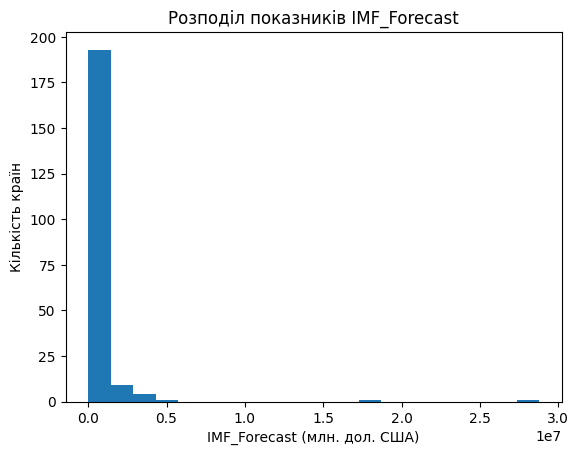

In [400]:
plt.hist(vvp_df['IMF_Forecast'].dropna(), bins=20)
plt.title('Розподіл показників IMF_Forecast')
plt.xlabel('IMF_Forecast (млн. дол. США)')
plt.ylabel('Кількість країн')
plt.show()

16. Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

In [401]:
vvp_df['Share IMF_Forecast'] = vvp_df['IMF_Forecast'] / vvp_df['IMF_Forecast'].sum()
vvp_df['Share World Bank_Estimate'] = vvp_df['World Bank_Estimate'] / vvp_df['World Bank_Estimate'].sum()
vvp_df['Share United Nations_Estimate'] = vvp_df['United Nations_Estimate'] / vvp_df['United Nations_Estimate'].sum()
vvp_df[['Country',
        'Share IMF_Forecast',
        'Share World Bank_Estimate',
        'Share United Nations_Estimate'
        ]]

,Country,Share IMF_Forecast,Share World Bank_Estimate,Share United Nations_Estimate
1,United States,2.439764e-01,2.528209e-01,2.560285e-01
2,China,1.571006e-01,1.644276e-01,1.786461e-01
3,Germany,3.891861e-02,4.117514e-02,4.054554e-02
4,Japan,3.484417e-02,3.892851e-02,4.208952e-02
5,India,3.337392e-02,3.280201e-02,3.446526e-02
...,...,...,...,...
205,Kiribati,2.636337e-06,2.578020e-06,2.217764e-06
206,Palau,2.610906e-06,2.430176e-06,2.237655e-06
207,Marshall Islands,2.585476e-06,2.624221e-06,2.774692e-06
208,Nauru,1.364792e-06,1.422993e-06,1.461934e-06


17.Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?


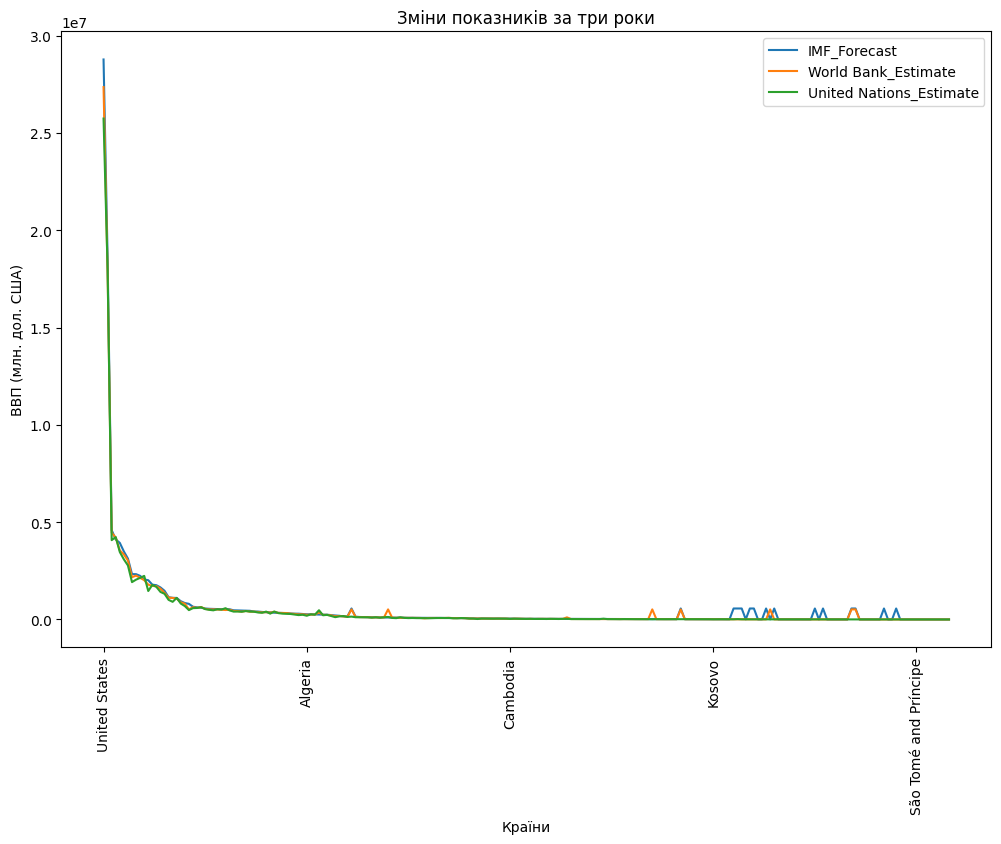

In [402]:
vvp_df.set_index('Country')[['IMF_Forecast', 'World Bank_Estimate', 'United Nations_Estimate']].plot(kind='line', figsize=(12, 8))
plt.title('Зміни показників за три роки')
plt.ylabel('ВВП (млн. дол. США)')
plt.xlabel('Країни')
plt.xticks(rotation=90)
plt.show()

Завдання №2

In [403]:
path = "C:/Users/Иван/Desktop/Labs/LB_2/titanic.csv"
titanic = pd.read_csv(path)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1. Вивести перших 5 рядків.

In [404]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2. Визначити розмір датасета.

In [405]:
titanic.shape

(418, 12)

3. Визначити тип даних

In [406]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення. 

In [407]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [408]:
titanic.fillna({'Fare': titanic['Fare'].mean()}, inplace=True)
titanic.fillna({'Age': titanic['Age'].mean()}, inplace=True)

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [409]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

7. Вивести описову статистику датасету describe()

In [410]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


8. Видалити стовпчик Cabin

In [411]:
titanic = titanic.drop(columns='Cabin')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


9. Сформувати датасет з обраними стовпцями: 
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [412]:
selected_titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
selected_titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.50000,7.8292
1,1,3,female,47.00000,7.0000
2,0,2,male,62.00000,9.6875
3,0,3,male,27.00000,8.6625
4,1,3,female,22.00000,12.2875
...,...,...,...,...,...
413,0,3,male,30.27259,8.0500
414,1,1,female,39.00000,108.9000
415,0,3,male,38.50000,7.2500
416,0,3,male,30.27259,8.0500


10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика)

In [413]:
selected_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [414]:
selected_titanic['Sex'] = selected_titanic['Sex'].replace({'female': 1, 'male': 0}).astype(int)
selected_titanic

C:\Users\Иван\AppData\Local\Temp\ipykernel_20016\615169743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_titanic['Sex'] = selected_titanic['Sex'].replace({'female': 1, 'male': 0}).astype(int)
C:\Users\Иван\AppData\Local\Temp\ipykernel_20016\615169743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_titanic['Sex'] = selected_titanic['Sex'].replace({'female': 1, 'male': 0}).astype(int)


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.50000,7.8292
1,1,3,1,47.00000,7.0000
2,0,2,0,62.00000,9.6875
3,0,3,0,27.00000,8.6625
4,1,3,1,22.00000,12.2875
...,...,...,...,...,...
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500


11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

In [417]:
selected_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

12. Вивести 5 перших рядків датасету.

In [418]:
selected_titanic.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


13. Вивести 5 останніх рядків датасету.

In [419]:
selected_titanic.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

In [421]:
survival_by_sex = selected_titanic.groupby('Sex')['Survived'].mean() * 100
survival_by_sex

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64

15. Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

In [422]:
survival_by_class = selected_titanic.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

In [423]:
mean_age_by_survival = selected_titanic.groupby('Survived')['Age'].mean()
mean_age_by_survival

Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64

17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

In [425]:
selected_titanic['Fare_Group'] = pd.qcut(selected_titanic['Fare'], 4, labels=False)
survival_by_fare_group = selected_titanic.groupby('Fare_Group')['Survived'].mean() * 100
survival_by_fare_group

C:\Users\Иван\AppData\Local\Temp\ipykernel_20016\2195193079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_titanic['Fare_Group'] = pd.qcut(selected_titanic['Fare'], 4, labels=False)


Fare_Group
0    26.315789
1    27.083333
2    39.047619
3    53.398058
Name: Survived, dtype: float64

18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?


In [426]:
mean_fare_by_class = selected_titanic.groupby('Pclass')['Fare'].mean()
mean_fare_by_class

Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64

19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [427]:
mean_age_by_class = selected_titanic.groupby('Pclass')['Age'].mean()
mean_age_by_class

Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64

20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?


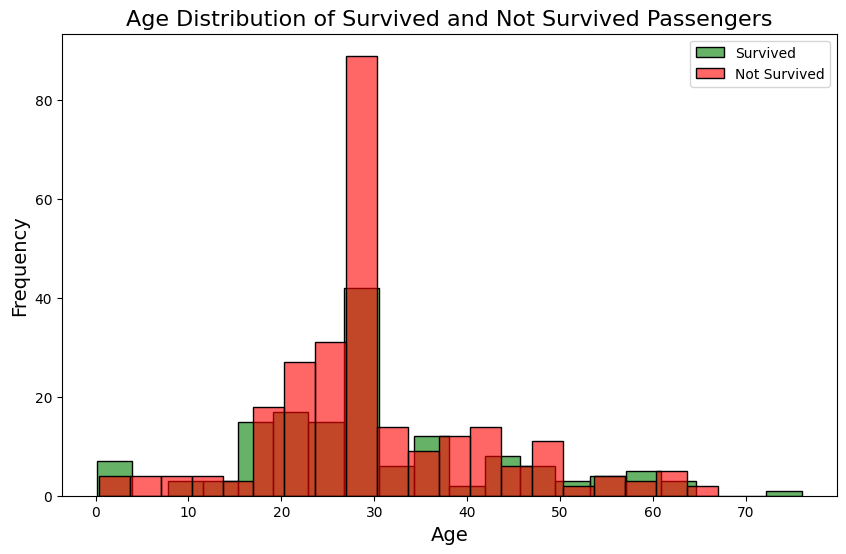

In [430]:
plt.figure(figsize=(10, 6))
sns.histplot(selected_titanic[selected_titanic['Survived'] == 1]['Age'], bins=20, kde=False, color='green', label='Survived', alpha=0.6)
sns.histplot(selected_titanic[selected_titanic['Survived'] == 0]['Age'], bins=20, kde=False, color='red', label='Not Survived', alpha=0.6)

plt.title('Age Distribution of Survived and Not Survived Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [433]:
survival_rate = selected_titanic.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
survival_rate_df = survival_rate.reset_index()
survival_rate_df.rename(columns={'Survived': 'Survival_rate (%)'}, inplace=True)

survival_rate_df

,Sex,Pclass,Survival_rate (%)
0,0,1,0.0
1,0,2,0.0
2,0,3,0.0
3,1,1,100.0
4,1,2,100.0
5,1,3,100.0


22. Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [434]:
corr = selected_titanic[['Survived', 'Pclass',  'Age', 'Fare']].corr()
corr

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.108615,-0.000011,0.191382
Pclass,-0.108615,1.000000,-0.440782,-0.576619
Age,-0.000011,-0.440782,1.000000,0.326800
Fare,0.191382,-0.576619,0.326800,1.000000
